In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
from sunRay.parameters import c,c_r,R_S  # physics parameters
from scipy import integrate


from matplotlib import rc
#rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)

In [2]:

%load_ext autoreload
%autoreload 2

In [283]:

#data_set  = np.load('../RUN3/funda/RUN_[eps0.27]_[alpha0.72143].lv1.npz')

data_set  = np.load('../RUN3/funda/RUN_[eps0.282]_[alpha0.72143].lv1.npz')
#data_set  = np.load('../RUN3/funda/RUN_[eps0.27]_[alpha0.614].lv1.npz')
pat='funda'
#data_set  = np.load('../RUN3/'+pat+'/RUN_[eps0.102]_[alpha0.15743].lv1.npz')
#data_set  = np.load('../RUN3/'+pat+'/RUN_[eps0.354]_[alpha0.15743].lv1.npz')
#data_set  = np.load('../RUN3/'+pat+'/RUN_[eps0.102]_[alpha0.802].lv1.npz')
data_set  = np.load('../RUN3/'+pat+'/RUN_[eps0.354]_[alpha0.802].lv1.npz')


#data_set  = np.load('../RUN3/f105/RUN_[eps0.354]_[alpha0.15743].lv1.npz')

#

In [284]:
dir(data_set.f)

['anis',
 'asym',
 'collect_N',
 'epsilon',
 'f_ratio',
 'freq0',
 'k_vec_0',
 'k_vec_stat_avail',
 'omega0',
 'photon_N',
 'r_vec_0',
 'r_vec_stat_avail',
 'start_phi',
 'start_r',
 'start_theta',
 'steps_N',
 't_reach_stat_avail',
 'tau_stat_avail']

In [285]:
# collect the data
anis  = data_set.f.anis
asym  = data_set.f.asym
collect_N  = data_set.f.collect_N
epsilon  = data_set.f.epsilon
f_ratio  = data_set.f.f_ratio
freq0  = data_set.f.freq0
k_vec_0  = data_set.f.k_vec_0
k_vec_stat_avail  = data_set.f.k_vec_stat_avail
omega0  = data_set.f.omega0
photon_N  = data_set.f.photon_N
r_vec_0  = data_set.f.r_vec_0
r_vec_stat_avail  = data_set.f.r_vec_stat_avail
start_phi  = data_set.f.start_phi
start_r  = data_set.f.start_r
start_theta  = data_set.f.start_theta
steps_N  = data_set.f.steps_N
t_reach_stat_avail  = data_set.f.t_reach_stat_avail
tau_stat_avail  = data_set.f.tau_stat_avail

In [286]:
# for all params

ang_rot_set = np.linspace(0,88,60)

#ang_rot = 30
#ang_rot = 0

# 并行化

t_step = 0.005
num_t_bins=60
num_mu_bins=100

offset_collect_xa = np.zeros(ang_rot_set.shape)
offset_collect_xb = np.zeros(ang_rot_set.shape)

idx=0
for ang_rot in ang_rot_set:

    # Important !!! rotate the initial point
    r_vec_rot,k_vec_rot = raystat.rotateCoordKX(
        r_vec_stat_avail,k_vec_stat_avail,-ang_rot*np.pi/180)
    r_vec0_rot,k_vec0_rot = raystat.rotateCoordKX(
        r_vec_0,k_vec_0,-ang_rot*np.pi/180)

    (x_im_stat,y_im_stat,t_reach_1au_stat,weights_stat,t_free_stat
        )=raystat.ImgXYtEstimate(r_vec_rot,k_vec_rot,t_reach_stat_avail,
                tau_stat_avail,r_vec0_rot, k_vec0_rot,num_t_bins=60)

    x_0,y_0=np.mean(r_vec0_rot,axis=1)[0:2]

    (xc,yc,sx,sy,
     err_xc,err_yc,err_sx,err_sy) = raystat.centroidXYFWHM(
                x_im_stat,y_im_stat,weights_stat)
    
    offset_collect_xa[idx] = xc-x_0
    
    idx=idx+1


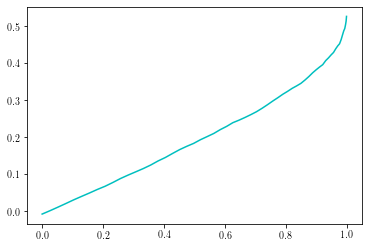

In [287]:
plt.plot(np.sin(ang_rot_set/180*np.pi),offset_collect_xa,'c')

In [269]:
ls

autograd_test2.ipynb*          ray_shape.png*
autograd_test.ipynb*           ray_statistical.ipynb*
benchmark/                     ray_test_prototype_non_scat.ipynb*
electron_density.png*          ray_test_validate_refrac.ipynb*
f35MHz20deg.png*               README.md*
gaussianFit2d.py*              requirements.txt*
img/                           simulation_result_v001.pdf*
moviedir/                      simulation_result_v001.png*
mpi_job_sbatch_harmo.sh*       sunRay/
mpi_job_sbatch.sh*             sunRay_MPI_harmo.py*
parsetRUN3.funda.rot30.v1.npz  sunRay_MPI.py*
parsetRUN3.funda.rot45.v1.npz  sunray_offset.ipynb
parsetRUN3.funda.rot60.v1.npz  sunray_ParsetReduction.py*
parsetRUN3.harmo.rot30.v1.npz  sunRay_SingleNodeMP.py*
parsetRUN3.harmo.rot60.v1.npz  sunray_test_lv1_data.ipynb*
parsetRUN3.harmo.v1.npz        sunRay_tmp.py*
parsetRUN3.v1.npz              test_case_1000.png*
parset.v1.npz                  test_movie.png
ray_scat_test.ipynb*           usefulBashScript/


In [89]:
import sunRay.statisticalRays as raystat

In [261]:
angrotstr='30'

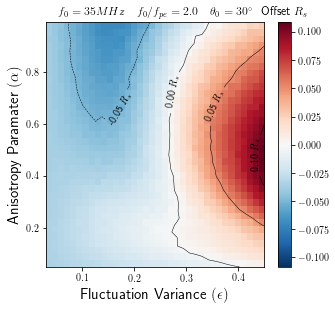

In [262]:
import numpy as np
data_par  = np.load('parsetRUN3.harmo.rot'+angrotstr+'.v1.npz')

res = (data_par.f.arr_0)

arr_eps   = np.linspace(0.03,0.45,36)    
arr_alpha = np.linspace(0.05,0.99,36)


from scipy.ndimage.filters import gaussian_filter
sigma=0.4
#data = gaussian_filter(data, sigma)

plt.figure(figsize=[5,4.5])

plt.imshow(res[3].T,origin='lower',
           extent=[np.min(arr_eps),np.max(arr_eps),np.min(arr_alpha),np.max(arr_alpha)],
          cmap='RdBu_r',vmax=np.max(res[3]),vmin=-np.max(res[3]))#,vmax=7,vmin=0)
cbar = plt.colorbar()
cbar.ax.set_title('Offset $R_s$')

ax = plt.gca()

CS = ax.contour(arr_eps,arr_alpha,gaussian_filter(res[3].T,sigma),[-0.2,-0.1,-0.05,0.0,0.05,0.1,0.2],colors=['k'],linewidths =0.5)
ax.clabel(CS,  CS.levels,  inline=True,  fontsize=10,fmt=r'%1.2f $R_s$')
ax.clabel(CS0, CS0.levels, inline=True,  fontsize=10,fmt=r'%1.2f $R_s$')

ax.set_xlabel(r'Fluctuation Variance $(\epsilon)$',fontsize=15)
ax.set_ylabel(r'Anisotropy Paramater $(\alpha)$',fontsize=15)

ax.set_aspect(1/2)
ax.set_title(r'$f_0=35MHz \quad f_0/f_{pe}=2.0\quad \theta _0='+angrotstr+'^{\circ}$')
fig = plt.gcf()

fig.savefig('img/offset_harmo'+angrotstr+'.pdf')
#plt.gca().set_xticks(range(len(arr_eps)))
#plt.gca().set_yticks(range(len(arr_eps)))
#plt.gca().set_yticklabels(arr_alpha)
#plt.gca().set_xticklabels(np.round(arr_eps*100))



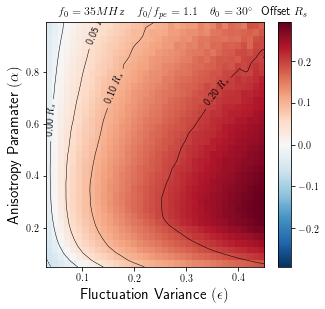

In [263]:
import numpy as np
data_par  = np.load('parsetRUN3.funda.rot'+angrotstr+'.v1.npz')
res = data_par.f

res = (data_par.f.arr_0)

arr_eps   = np.linspace(0.03,0.45,36)    
arr_alpha = np.linspace(0.05,0.99,36)


from scipy.ndimage.filters import gaussian_filter
sigma=0.5
#data = gaussian_filter(data, sigma)

plt.figure(figsize=[5,4.5])


plt.imshow(res[3].T,origin='lower',
           extent=[np.min(arr_eps),np.max(arr_eps),np.min(arr_alpha),np.max(arr_alpha)],
          cmap='RdBu_r',vmax=np.nanmax(res[3]),vmin=-np.nanmax(res[3]))#,vmax=7,vmin=0)
cbar = plt.colorbar()
cbar.ax.set_title('Offset $R_s$')

ax = plt.gca()

CS = ax.contour(arr_eps,arr_alpha,gaussian_filter(res[3].T,sigma),[-0.05,0.0,0.05,0.1,0.2,0.3,0.4],colors=['k'],linewidths =0.5)
ax.clabel(CS,  CS.levels,  inline=True,  fontsize=10,fmt=r'%1.2f $R_s$')
ax.clabel(CS0, CS0.levels, inline=True,  fontsize=10,fmt=r'%1.2f $R_s$')

ax.set_xlabel(r'Fluctuation Variance $(\epsilon)$',fontsize=15)
ax.set_ylabel(r'Anisotropy Paramater $(\alpha)$',fontsize=15)

ax.set_aspect(1/2)
ax.set_title(r'$f_0=35MHz \quad f_0/f_{pe}=1.1\quad \theta _0='+angrotstr+'^{\circ}$')
fig = plt.gcf()

fig.savefig('img/offset_funda'+angrotstr+'.pdf')

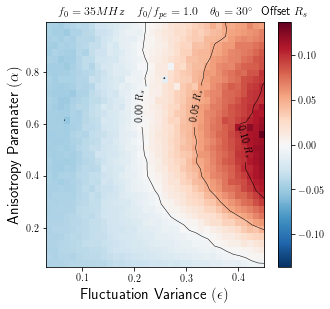

In [226]:
import numpy as np
data_par  = np.load('parsetRUN3.harmo.rot30.v1.npz',allow_pickle=True)

res = (data_par.f.arr_0)

arr_eps   = np.linspace(0.03,0.45,36)    
arr_alpha = np.linspace(0.05,0.99,36)

res_cur = res[10]
#res_cur = np.abs(res_cur)

imlim = np.nanmax([np.nanmax(res_cur),np.nanmax(-res_cur)])

mask = np.isnan(res_cur)
res_cur[mask] = np.interp(np.flatnonzero(mask), np.flatnonzero(~mask), res_cur[~mask])

from scipy.ndimage.filters import gaussian_filter
sigma=0.5
#data = gaussian_filter(data, sigma)

plt.figure(figsize=[5,4.5])

plt.imshow(res_cur.T,origin='lower',
           extent=[np.min(arr_eps),np.max(arr_eps),np.min(arr_alpha),np.max(arr_alpha)],
          cmap='RdBu_r',vmax=imlim,vmin=-imlim)#,vmax=7,vmin=0)
cbar = plt.colorbar()
cbar.ax.set_title('Offset $R_s$')

ax = plt.gca()

CS = ax.contour(arr_eps,arr_alpha,gaussian_filter(res_cur.T,sigma),[-0.05,0.0,0.05,0.1,0.2],colors=['k'],linewidths =0.5)
ax.clabel(CS,  CS.levels,  inline=True,  fontsize=10,fmt=r'%1.2f $R_s$')

ax.set_xlabel(r'Fluctuation Variance $(\epsilon)$',fontsize=15)
ax.set_ylabel(r'Anisotropy Paramater $(\alpha)$',fontsize=15)

ax.set_aspect(1/2)
ax.set_title(r'$f_0=35MHz \quad f_0/f_{pe}=1.0\quad \theta _0=30^{\circ}$')
fig = plt.gcf()

fig.savefig('img/offset_funda_ab.pdf')

In [179]:
data_par.f.arr_0[0][0]


array([0.19262138, 0.18693854, 0.18988993, 0.19353667, 0.19039928,
       0.18515825, 0.18761263, 0.17891698, 0.1874522 , 0.17857707,
       0.17855407, 0.17388438, 0.17034846, 0.17797953, 0.17574238,
       0.1699808 , 0.16098658, 0.17125967, 0.1650603 , 0.16662336,
       0.15543766, 0.16140749, 0.15555632, 0.16246926, 0.1647884 ,
       0.16479028, 0.1692065 , 0.17645998, 0.17400294, 0.17348526,
       0.18573359, 0.15836164, 0.17482886, 0.18186018, 0.17336993,
       0.15512792])

In [163]:
mask

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False,  True, False],
       ...,
       [False, False, False, ..., False,  True,  True],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False,  True]])

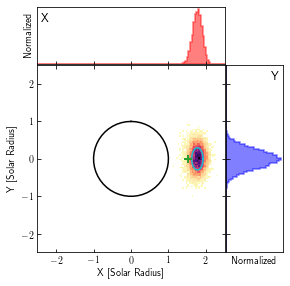

In [29]:
#hst = plt.hist2d(x_im_stat,y_im_stat,bins=[np.linspace(-2,2,100),np.linspace(-2,2,100)],weights=np.exp(-tau_stat))
#plt.axis('equal')
from sunRay.showPlot import XYDistributionImageHist

x_0,y_0=np.mean(r_vec0_rot,axis=1)[0:2]

fig,ax=XYDistributionImageHist(x_im_stat,y_im_stat,bins_data=np.linspace(-2.5,2.5,120)
            ,weights_data=weights_stat)

ax.plot(x_0,y_0,'+',color='C2',mew=2,markersize=8)

fig.savefig('img/xydist.pdf')


Total duration : 0.31275554781242954
Duration R/D : [0.10215 0.21061]
Vx R/D : 0.51157 , 0.36982
Vx R/D (c) : 1.18763 , 0.85855
Vy R/D : 0.01743 , 0.05817
Vy R/D (c) : 0.04047 , 0.13504
ERx R/D : 0.27789 , 0.06896
ERx R/D (Deg) : 0.14821 , 0.03678
ERx R/D : 0.77123 , 0.64408
ERx R/D (Deg) : 0.41132 , 0.34351
Offset R/D  x: 0.205442 , 0.274519
Offset R/D  y: 0.006684 , -0.002874


[0.2054420528743416,
 0.2745191649827495,
 0.006684012179903192,
 -0.0028744260166772735]

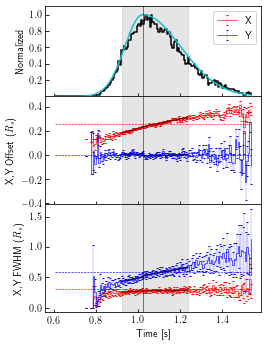

In [36]:
from sunRay.showPlot import XYVariationPlot,MuVariationPlot

res=XYVariationPlot(x_im_stat,y_im_stat,t_reach_1au_stat,weights_stat,num_t_bins = 140,x_0=x_0,y_0=y_0,offset=True)
res[0].savefig('img/varXYt.pdf')


res[3]['offset']
#print the variation make a table #TODO
# offset
# 140 in paper

In [31]:
(xc,yc,sx,sy,err_xc,err_yc,err_sx,err_sy
    ) = raystat.centroidXYFWHM(x_im_stat,y_im_stat,weights_stat)

print(xc-x_0,yc-y_0,sx,sy)

0.25796468146744167 -0.00013435088106069338 0.3033694256940134 0.5914275959204888


In [13]:
np.mean(np.sqrt(np.sum(r_vec_stat_avail**2,axis=0)))

204.99999998294135

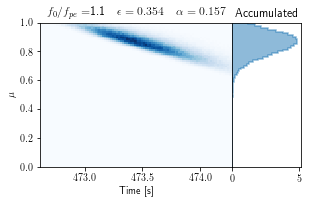

In [14]:

(fig,ax1,ax2)=MuVariationPlot(k_vec_stat_avail,t_reach_stat_avail,
                              np.exp(-tau_stat_avail),t_step = 0.05,
                    num_t_bins=100,num_mu_bins=80)

ax1.set_title(r'$f_0/f_{pe}=$'+str(np.round(f_ratio,3))+r'\quad'+
              r'$\epsilon='+str(np.round(epsilon,3))+r'\quad \alpha='+
              str(np.round(anis,3))+'$')

fig.savefig('img/'+pat+'_eps'+str(np.round(epsilon,3))+'a'+str(np.round(anis,3))+'.pdf')

In [342]:
np.sum(np.exp(-tau_stat_avail))/3e6


0.09374743948680511

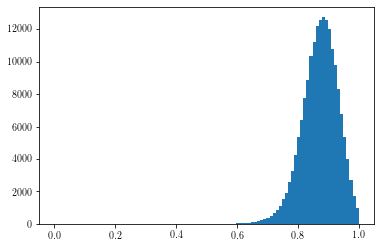

In [12]:
# make a movie
if False:
    from sunRay import showPlot as sp
    x0,y0=np.mean(r_vec0_rot,axis=1)[0],np.mean(r_vec0_rot,axis=1)[1]
    fr_cur=sp.MovieVariationXY(x_im_stat,y_im_stat,t_reach_1au_stat,weights_stat,t_step = 0.2,
                               num_t_bins=-1,xlim=[0,2],ylim=[-1,1],x_0=x0,y_0=y0,
                               title_this=r'$f_0/f_{pe}=$'+str(np.round(f_ratio,3))+r'\quad'+
                  r'$\epsilon='+str(np.round(epsilon,3))+r'\quad \alpha='+
                  str(np.round(anis,3))+r'\quad\theta_0='+str(np.round(ang_rot,3))+'$')
    #plt.gca().set_clim([0,1])
    #fr_cur.savefig('test_movie.png')

In [13]:
np.sqrt(np.sum(r_vec_stat_avail**2,axis=0))

array([204.99999343, 204.99999749, 205.00000024, ..., 205.0000037 ,
       205.00000963, 204.99999017])

In [14]:
k_vec_stat_avail.shape[0]

3

In [15]:
np.histogram(np.array([1,2,3]),bins=np.linspace(0,30,50))

(array([0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0]),
 array([ 0.        ,  0.6122449 ,  1.2244898 ,  1.83673469,  2.44897959,
         3.06122449,  3.67346939,  4.28571429,  4.89795918,  5.51020408,
         6.12244898,  6.73469388,  7.34693878,  7.95918367,  8.57142857,
         9.18367347,  9.79591837, 10.40816327, 11.02040816, 11.63265306,
        12.24489796, 12.85714286, 13.46938776, 14.08163265, 14.69387755,
        15.30612245, 15.91836735, 16.53061224, 17.14285714, 17.75510204,
        18.36734694, 18.97959184, 19.59183673, 20.20408163, 20.81632653,
        21.42857143, 22.04081633, 22.65306122, 23.26530612, 23.87755102,
        24.48979592, 25.10204082, 25.71428571, 26.32653061, 26.93877551,
        27.55102041, 28.16326531, 28.7755102 , 29.3877551 , 30.        ]))

In [16]:
import sunRay.plasmaFreq as pfreq

import numpy as np 
import torch
from sunRay.parameters import c_r
from sunRay import plasmaFreq as pfreq
from sunRay import densityModel as dm
from scipy import integrate
from scipy.optimize import curve_fit

In [17]:
integrate.quad(lambda x: (1/(c_r*np.sqrt(1.0-
                (pfreq.omega_pe_r_np(dm.leblanc98,x)/(omega0))**2)) ) ,1.4,215 )[0]

/home/amax/anaconda3/lib/python3.7/site-packages/scipy/integrate/quadpack.py:385: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  warnings.warn(msg, IntegrationWarning)


496.29489124890836

In [18]:
integrate.quad(lambda x: (1/(c_r*np.sqrt(1.0-
                (pfreq.omega_pe_r_np(dm.leblanc98,x)/(omega0*1.5))**2)) ) ,1.4,215 )[0]

496.0237828757457

In [13]:
'1'.rjust(3,'0')

'001'

In [221]:
x_0,y_0=np.mean(r_vec0_rot,axis=1)[0:2]

array([8.75033375e-01, 1.48617948e-08])

In [198]:
r_vec0_rot

array([[ 8.74904070e-01,  8.75072607e-01,  8.75059350e-01, ...,
         8.75124239e-01,  8.74971592e-01,  8.75116448e-01],
       [ 5.84294612e-05,  1.10376946e-04,  1.09373301e-04, ...,
         4.66776619e-05, -1.26895538e-04,  6.18316844e-05],
       [ 1.51561512e+00,  1.51553199e+00,  1.51559058e+00, ...,
         1.51554513e+00,  1.51557091e+00,  1.51552940e+00]])

In [292]:
1/c_r

2.321547698465644

In [310]:
205/215

0.9534883720930233